# Home Assignment No. 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [19]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time

import warnings
warnings.filterwarnings('ignore')

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and shift by mean and scale by standard deviation each column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [8]:
def normalize(arr):
    """Shift by mean and scale by standard deviation each column of a matrix.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to normalize.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    out = arr
    for i in range(n_rows):
        out[:, i] -= arr[:, i].mean()
        out[:, i] /= np.std(arr[:, i])
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{5,9\}$, $r\in\{2,3\}$, $d\in\{3,4\}$.

Make sure that each plot has different color.

To compute LCM you can use `math.gcd` and relationship between LCM and GCD

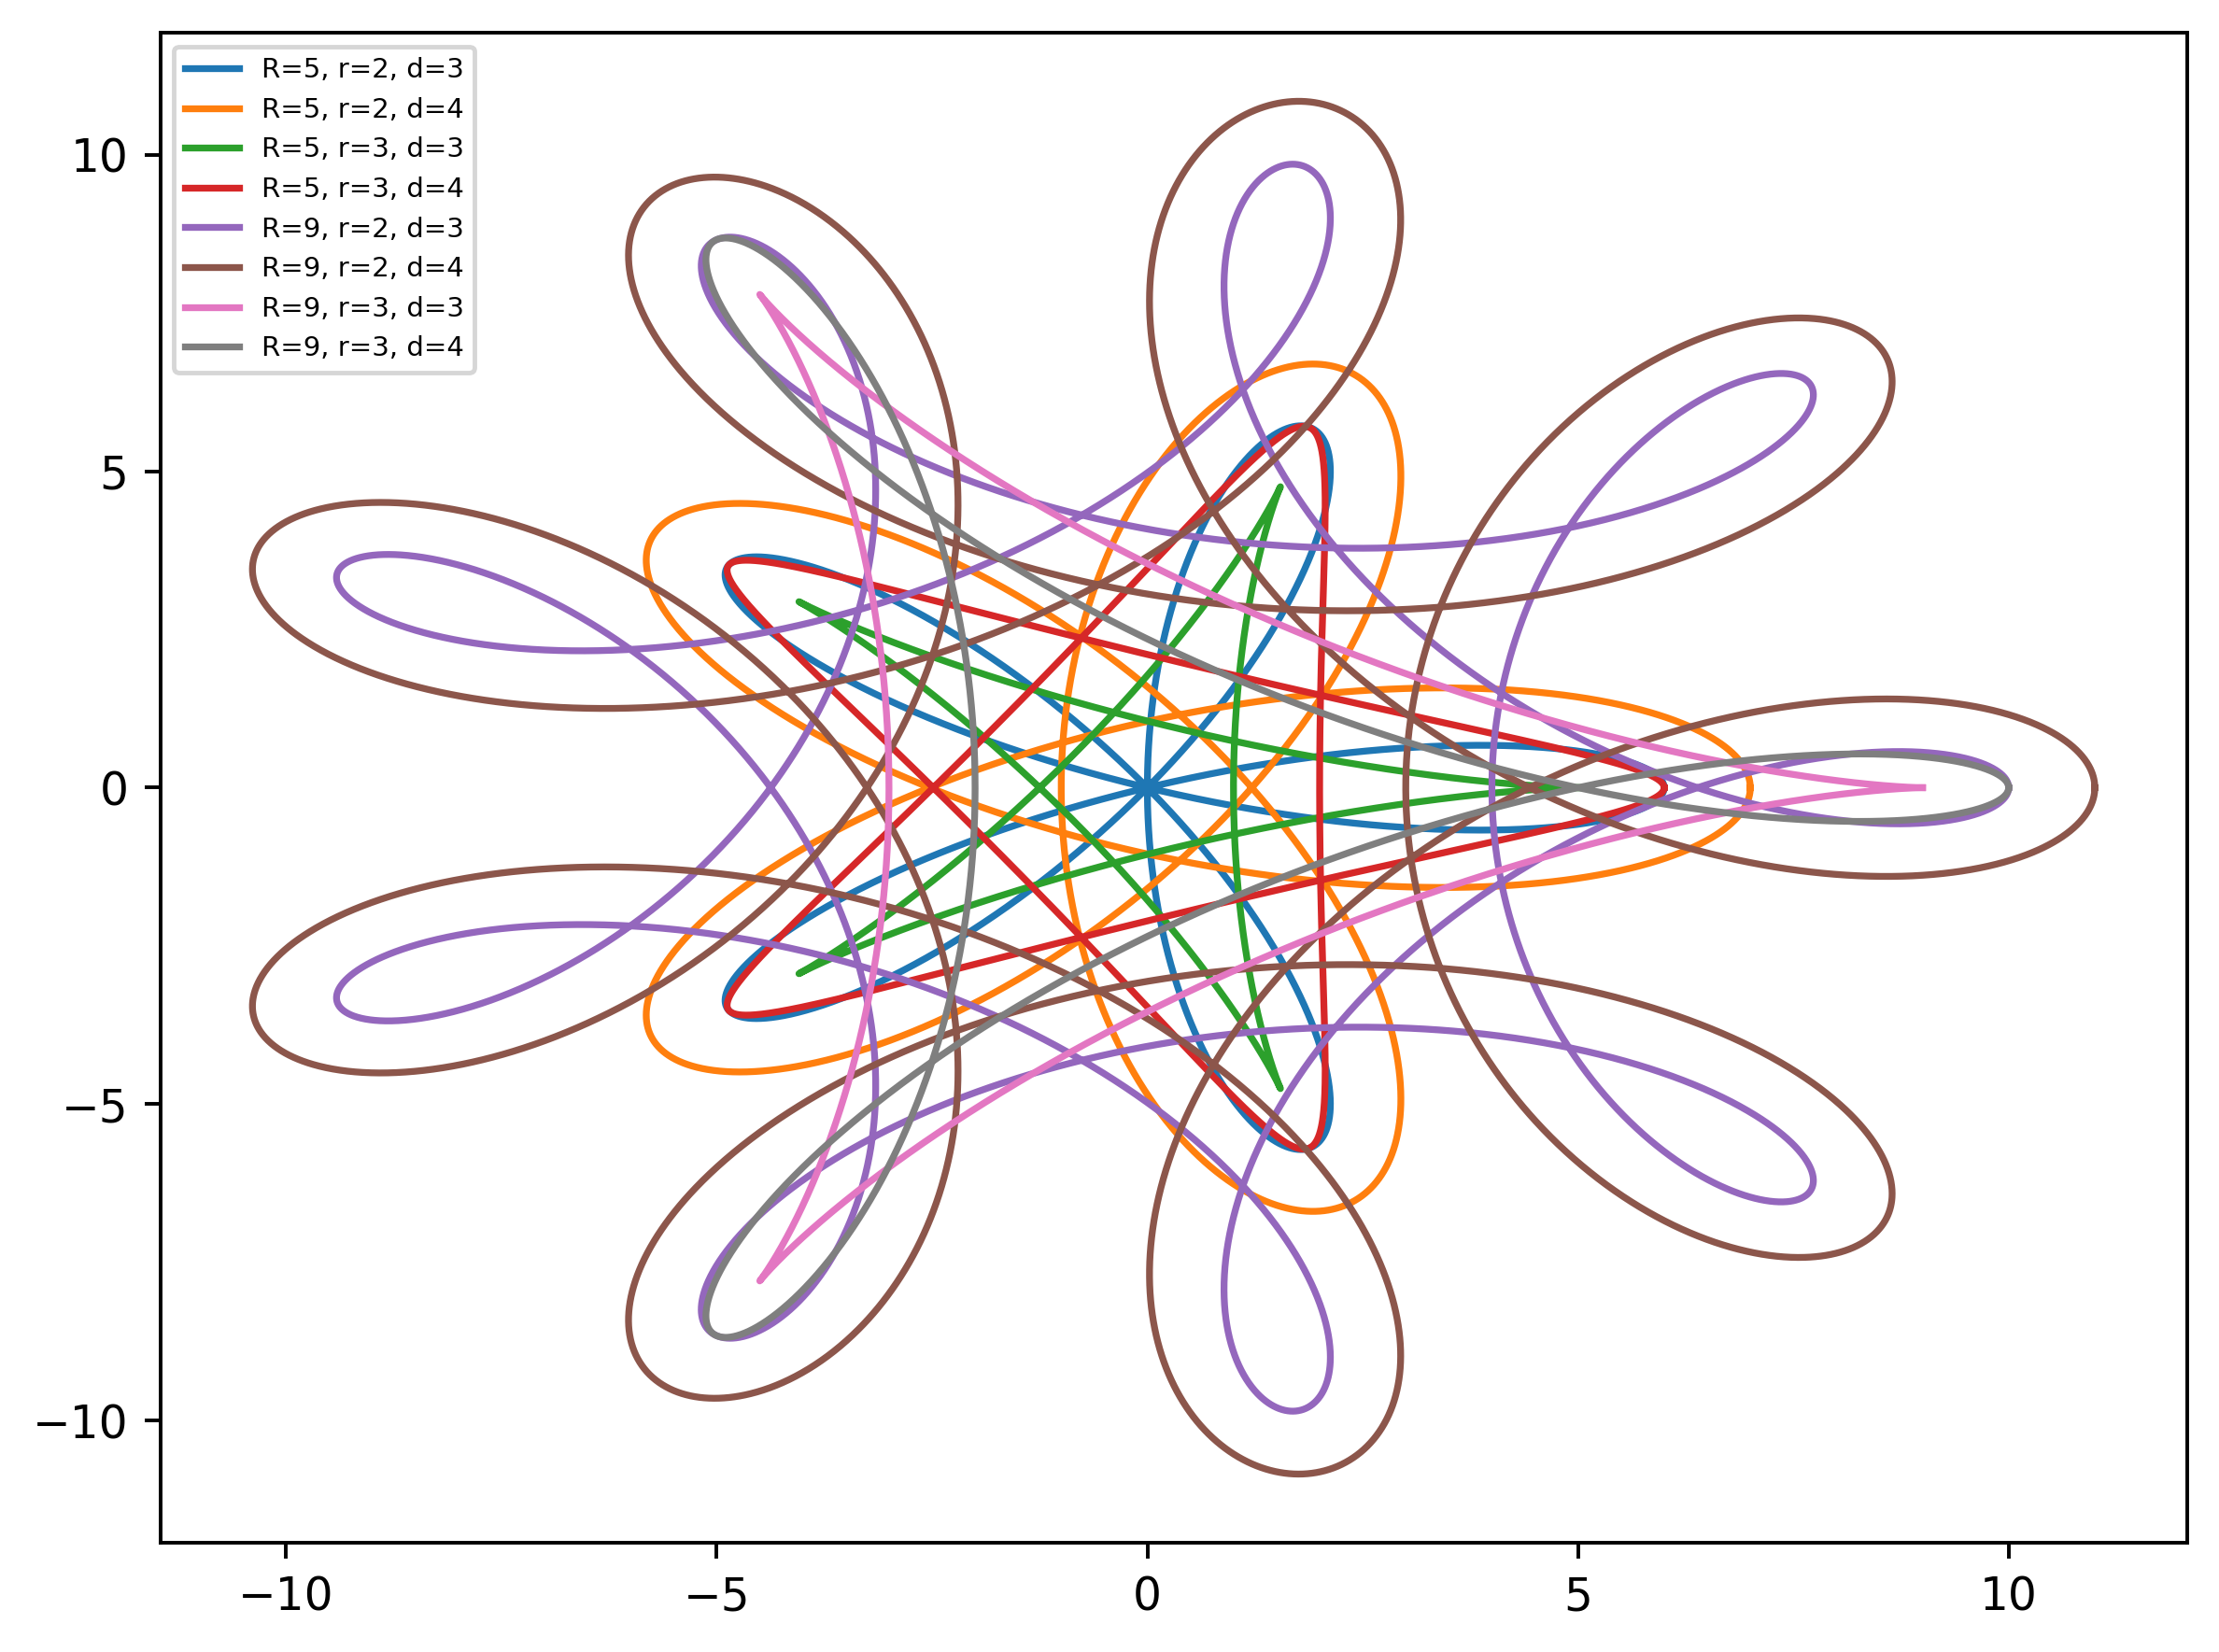

In [23]:
### BEGIN Solution (do not delete this comment)
import itertools
import math


def Hypotrochoid(R, r, d):
    lcm = (r * R) // math.gcd(r, R)
    t = np.linspace(0, 2 * np.pi * lcm / R, 10000)
    x = (R - r) * np.cos(t) + d * np.cos(((R - r) / r) * t)
    y = (R - r) * np.sin(t) - d * np.sin(((R - r) / r) * t)
    return x, y
  
    
plt.figure(figsize=(8,6), dpi=350)
for R, r, d in itertools.product([5, 9], [2, 3], [3, 4]):
    x, y = Hypotrochoid(R, r, d)
    plt.plot(x, y, label=f'R={R}, r={r}, d={d}')
plt.legend(fontsize=6)
plt.show()
### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{20}, \tfrac14, \tfrac12, 1, 1.5, 2, 5, 10, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

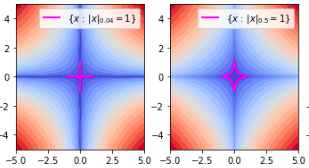

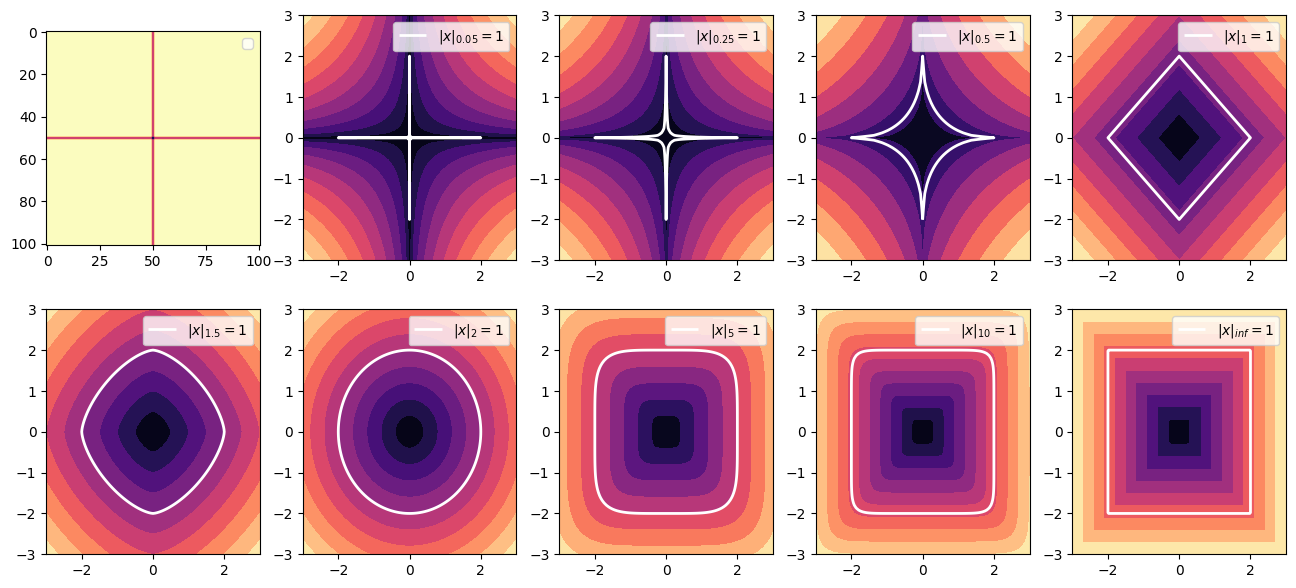

In [56]:
p_values = [0., 0.05, 0.25, 0.5, 1, 1.5, 2, 5, 10, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(16, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution (do not delete this comment)
    if p == 0:
        zz = (xx != 0).astype(int) + (yy != 0).astype(int)
        ax.imshow(zz, cmap='magma')
        ax.legend([fr'$|x|_{{{p}}} = 1$'], loc="upper right")
    else:
        if np.isinf(p):
            zz = np.maximum(np.abs(xx), np.abs(yy))
        else:
            zz = ((np.abs((xx)) ** p) + (np.abs((yy)) ** p)) ** (1 / p)
        ax.contourf(xx, yy, zz, 10, cmap='magma')
        cs = ax.contour(xx, yy, zz, [2], colors='white', linewidths = 2)
        ax.legend(cs.legend_elements()[0], [fr'$|x|_{{{p}}} = 1$'] , loc="upper right")
    ### END Solution (do not delete this comment)
plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [24]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise, random_state=0xC0FFEE)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xC0FFEE)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

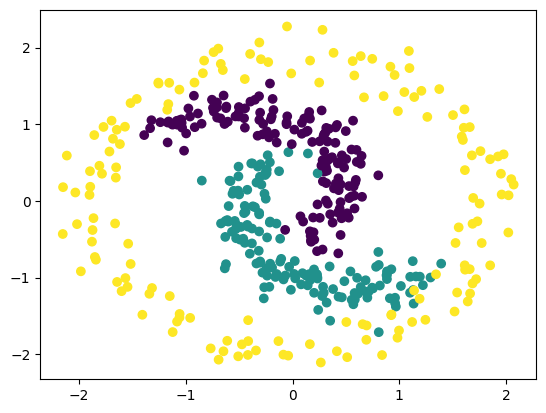

In [25]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 20$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $5$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

![image](data/ex.png)

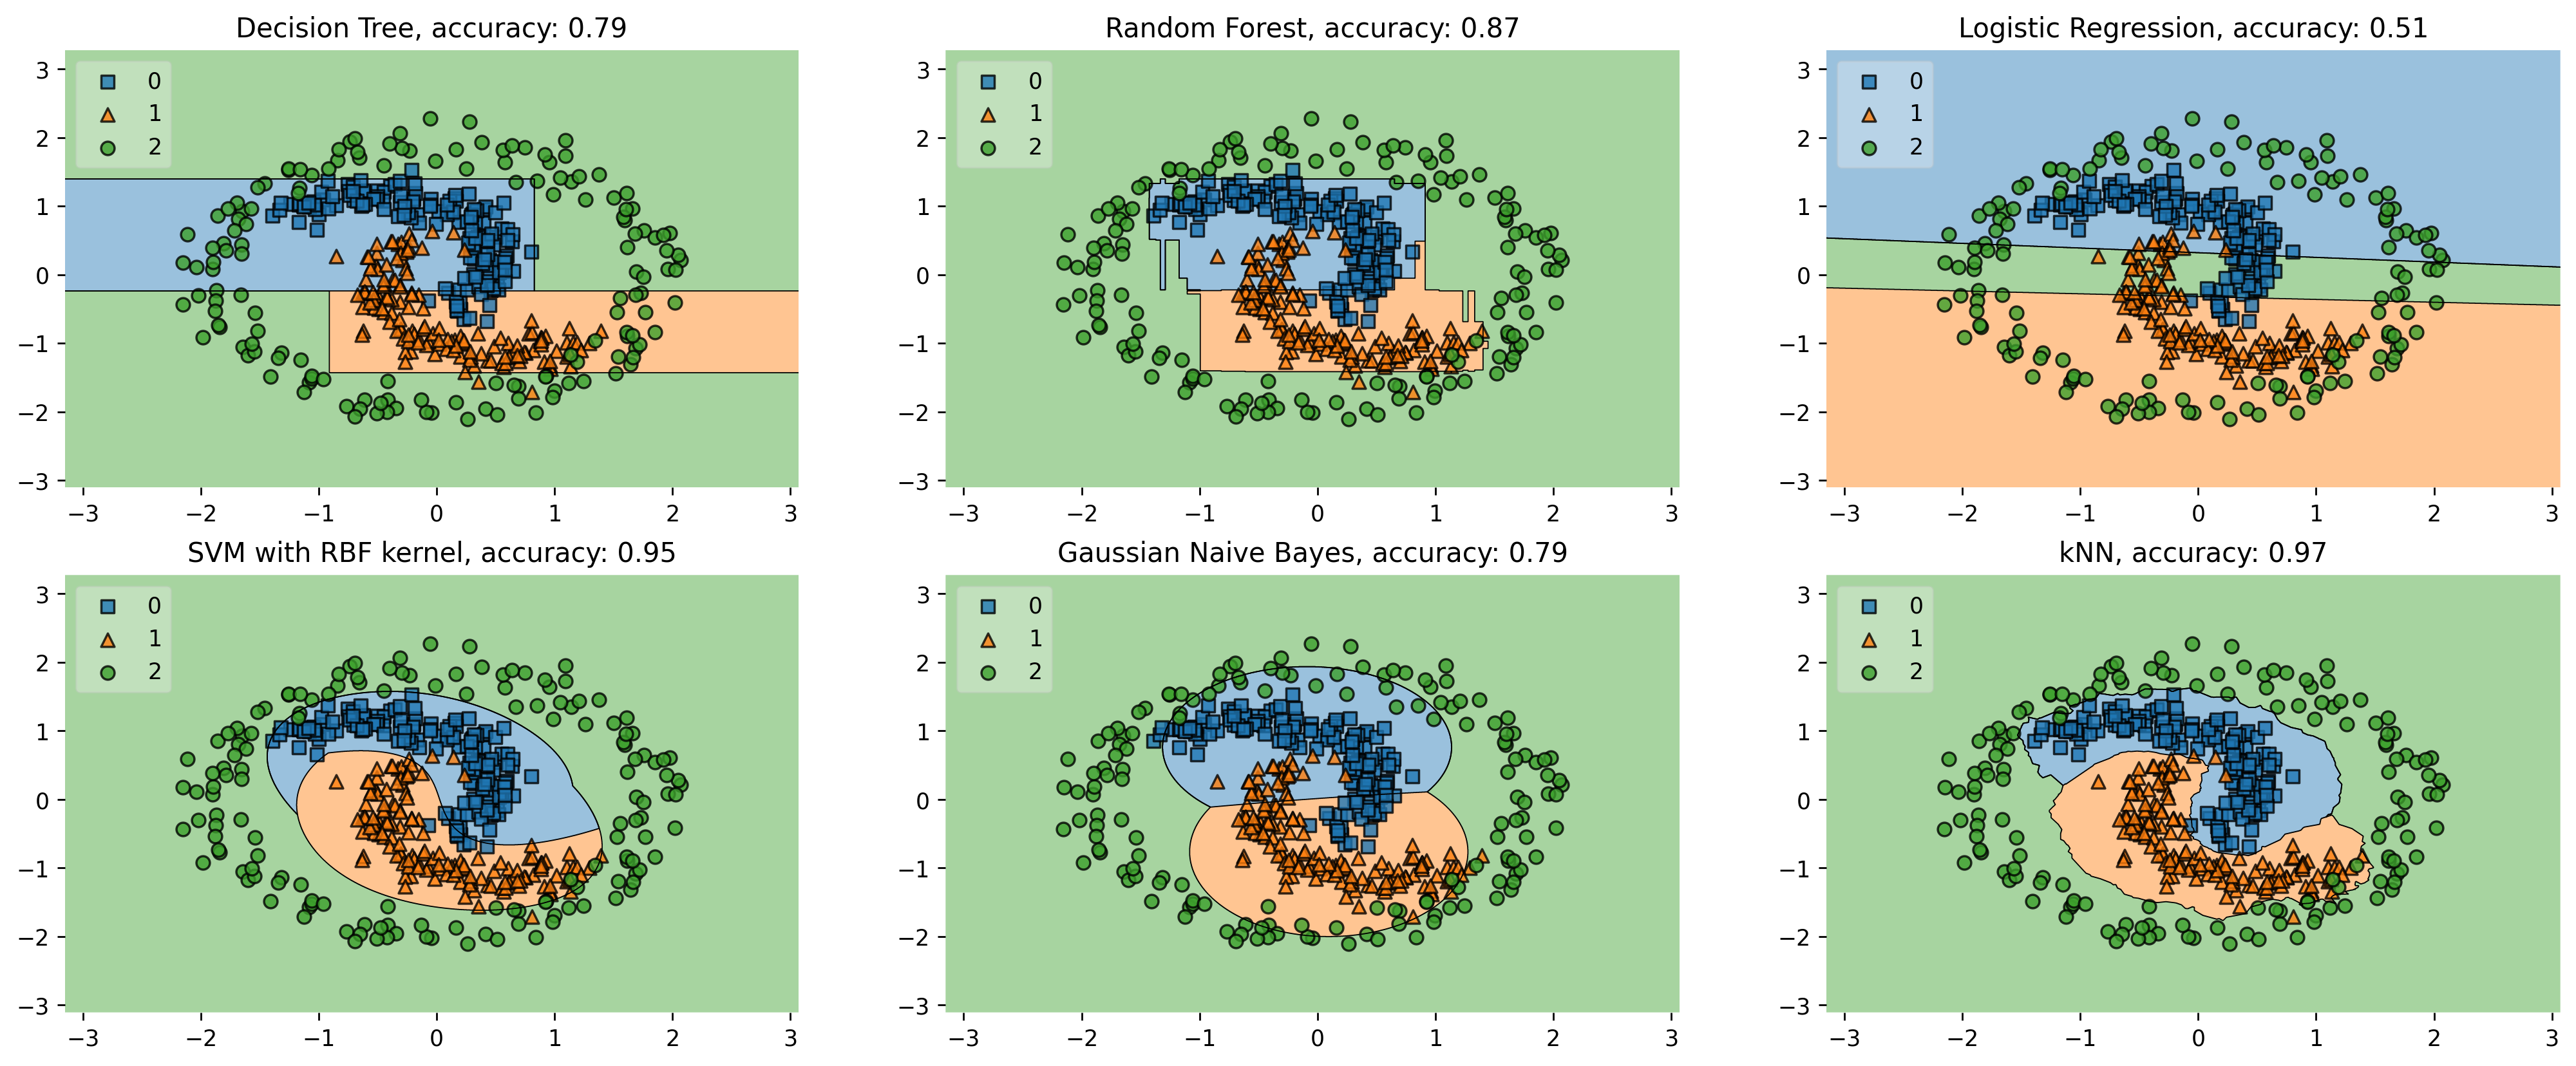

In [ ]:
### BEGIN Solution (do not delete this comment)
import matplotlib.gridspec as gridspec
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=15, n_jobs=-1)
clf3 = LogisticRegression()
clf4 = SVC(random_state=42, probability=True)
clf5 = GaussianNB()
clf6 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)


gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(20, 12), dpi=250)

labels = ['Decision Tree',
          'Random Forest',
          'Logistic Regression',
          'SVM with RBF kernel',
         'Gaussian Naive Bayes',
         'kNN']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    acc = clf.score(X, y)
    plt.title(lab + ", accuracy: {:.2f}".format(acc))

plt.show()

### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

New score for Logistic Regression is 0.97


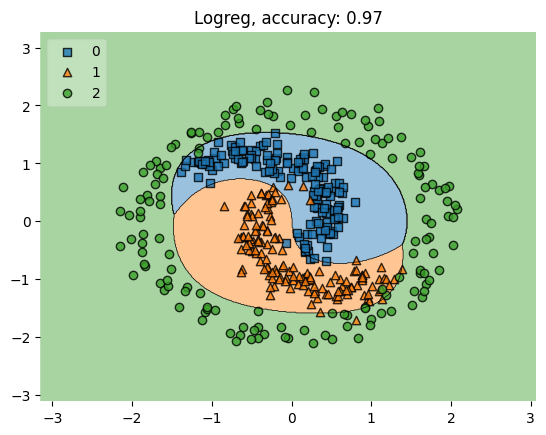

New score for Decision Tree is 0.97


In [37]:
### BEGIN Solution (do not delete this comment)
def add_feature(X, feature):
    return np.hstack((X, np.array([feature]).T))
#Try Logistic Regression with polynomial features
clf = LogisticRegression()
pipe = Pipeline([('poly', PolynomialFeatures(4)), ('clf', clf)])
pipe.fit(X, y)
acc = pipe.score(X, y)
print('New score for Logistic Regression is {:.2f}'.format(acc))




fig, ax = plt.subplots()
fig = plot_decision_regions(X=X, y=y,
                                clf=pipe, legend=2)
ax.set_title('Logreg' + ', accuracy: {:.2f}'.format(acc))
plt.show()

#Try DecisionTree with handmade features
feature_1 = X[:, 0] ** 2 + X[:, 1] ** 2
feature_2 = X[:, 0] / X[:, 1]

X_new = add_feature(X, feature_1)
X_new = add_feature(X_new, feature_2)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_new, y)
clf.score(X_new, y)
print('New score for Decision Tree is {:.2f}'.format(clf.score(X_new, y)))
### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

Logistic regression <br>
From original data we can see that Logistic Regression is able to distinguish classes 0 and 1 pretty good. By adding polynomial features we expect it to be able to work better with class 2 that can not be linearly separated from classes 0 and 1.

Decision Tree <br>
Green points seem to be the most distant from the center so we can add a feature that equals to the squared distance from (0,0). We also add $\frac{x}{y}$ to account for the angle.


## Task 5. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [39]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength
n = len(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
858,322.0,149.0,0.0,186.0,8.0,951.0,709.0,28.0,52.42
958,259.9,100.6,78.4,170.6,10.4,935.7,762.9,28.0,49.77
1004,279.8,128.9,100.4,172.4,9.5,825.1,804.9,28.0,52.83


Please note that both in Task 4 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data).

In this problem, we do a step further and split the whole data into the **train part** (on which we train), **validation part** (on which we tune hyperparameters) and **test part** (where we compute the final test score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 5.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the validation data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the train score, the validation score and the test score (use the model with best hyperparameters refitted on the train set).

In [41]:
### BEGIN Solution (do not delete this comment)
forest = RandomForestRegressor()
trees = ExtraTreesRegressor()

params = {'n_estimators':[10, 50, 100, 500, 1000, 1500, 3000, 5000],
          'max_depth':list(range(2, 14, 2))}

mode = ["Train", "Val",  "Test"]
data = []

for clf in (RandomForestRegressor(), ExtraTreesRegressor()):
    scores = []
    clf_grid = GridSearchCV(clf, params, scoring='neg_mean_squared_error', n_jobs=-1)
    clf_grid.fit(X_train, y_train)
    print(f'{clf.__class__.__name__} best params: {clf_grid.best_params_}')
    for X, y in [(X_train, y_train), (X_val, y_val), (X_test, y_test)]:
        scores.append(round(mse(y, clf_grid.predict(X)), 2))
    data.append(scores)

format_row = "{:>21}" * (len(mode) + 1)
print(format_row.format("", *mode))
for model, row in zip(['RandomForestRegressor', 'ExtraTreesRegressor'], data):
    print(format_row.format(model, *row))

### END Solution (do not delete this comment)

RandomForestRegressor best params: {'max_depth': 12, 'n_estimators': 500}
ExtraTreesRegressor best params: {'max_depth': 12, 'n_estimators': 1500}
                                     Train                  Val                 Test
RandomForestRegressor                 5.03                21.96                27.36
  ExtraTreesRegressor                 2.15                17.41                23.14


### Subproblem 5.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

* Big gap between score on train and scores on test/val is a sign of overfitting.
* ExtraTreesRegressor performs better. It can be due to the fact that it uses the whole training data instead of drawing samples from it.

## Task 6. Boosting (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step.

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your\_accuracy} - \text{sklearn\_accuracy}| \leq 0.005
\,. $$

In [227]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [228]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0xC0FFEE)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

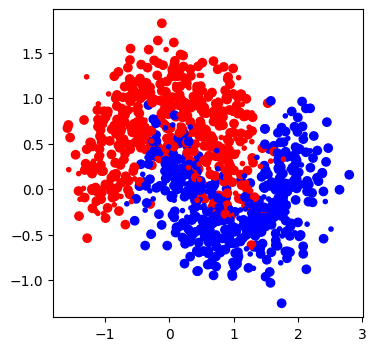

In [230]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)
plt.show()

In [231]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 6.1. AdaBoost alphas and distributions (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [235]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    N = ((y != y_pred_t) * distribution).sum()
    alpha = 0.5 * np.log((1 - N) / N)
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    distribution_new = distribution * np.exp(-alpha_t * y_pred_t * y)
    C = distribution_new.sum()
    distribution_new /= C
    ### END Solution (do not delete this comment)

    return distribution_new

### Subproblem 6.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [242]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            
            # make a prediction
            y_pred = self.classifiers[-1].predict(X)
            
            #update alphas, append new alpha to self.alphas
            self.alphas.append(self.get_alpha(y, y_pred, distribution))
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred, distribution, self.alphas[-1])
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        for i in range(self.n_estimators):
            final_predictions += self.alphas[i] * self.classifiers[i].predict(X)
                                                  
        
        ### END Solution (do not delete this comment)

        return np.sign(final_predictions)

In [243]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [244]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.895
accuracy ada_boost_sklearn: 0.89


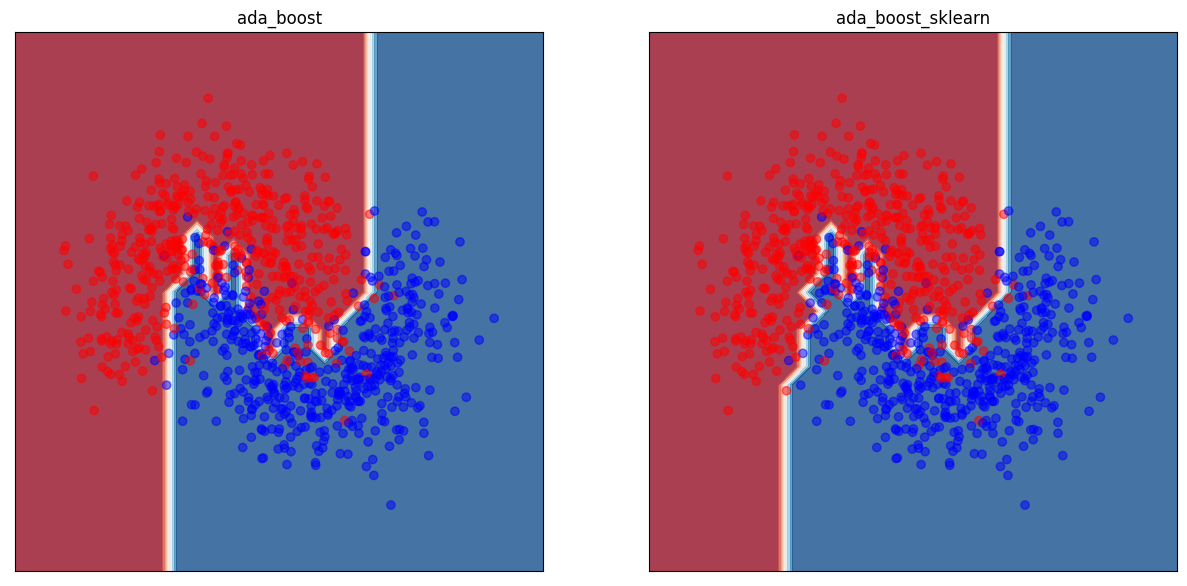

In [245]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 7. Gradient Boosting (1 point)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0xC0FFEE)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterward, compare the models' feature importances. 

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

Training time for XGBClassifier: 0.18512700000428595
Average precision score for XGBClassifier: 0.8034188034188035


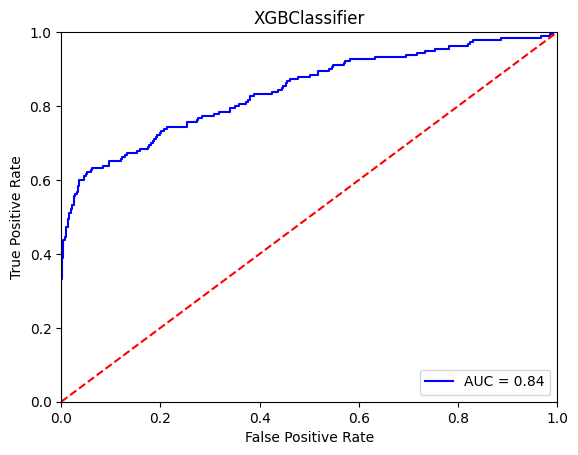

Training time for RandomForestClassifier: 0.2542689580004662
Average precision score for RandomForestClassifier: 0.8877551020408163


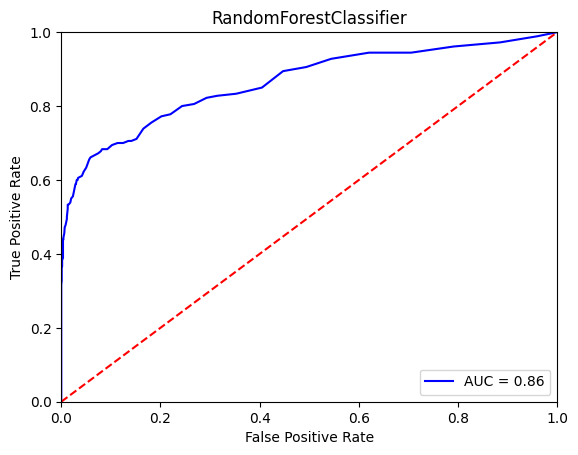

In [259]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import precision_score, roc_curve, auc


for model in (XGBClassifier(), RandomForestClassifier()):
    t_start = time.perf_counter()
    model.fit(X_train, y_train)
    train_time = time.perf_counter() - t_start
    
    name = model.__class__.__name__
    precision = precision_score(y_test, model.predict(X_test))
    print(f'Training time for {name}: {train_time}')
    print(f'Average precision score for {name}: {precision}')
    
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title(name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
### END Solution (do not delete this comment)

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

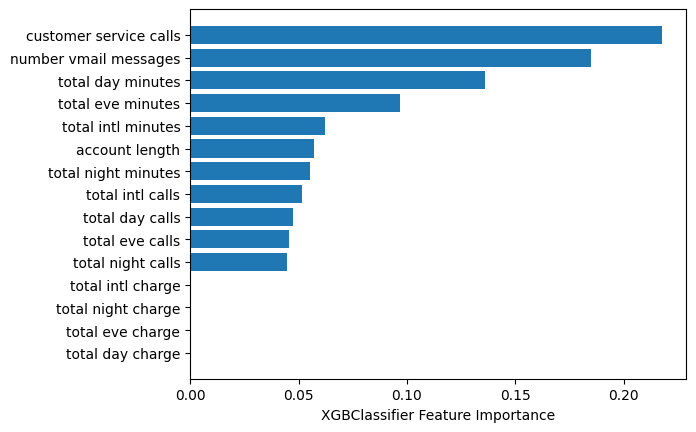

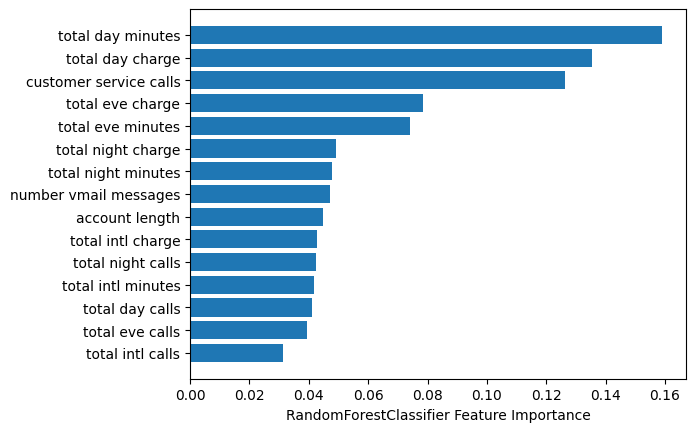

In [270]:
### BEGIN Solution (do not delete this comment)
for model in (XGBClassifier(), RandomForestClassifier()):
    model.fit(X_train, y_train)
    sorted_idx = model.feature_importances_.argsort()
    plt.barh(np.array(cols[:-1])[sorted_idx], model.feature_importances_[sorted_idx])
    plt.xlabel(f"{model.__class__.__name__} Feature Importance")
    plt.show()
### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**: <br>
Feature importances are different. It can be due to the fact that XGBoost can handle some features that are correlated (use only one of them) while RandomForest chooses features randomly and all of them have non-zero importance.

In [25]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings("ignore")

## Task 8. Model and feature selection problem (3 points)

Your goal in this task is to predict the price (```price_doc```) given some characteristics of a house. In order to do that, you will demonstrate your abilities in data preprocessing, finding feature importances, applying different ML models.

### Subproblem 8.1. Data preprocessing and feauture importances (1 point)

The goal of this subproblem is to prepare the data for further usage. Complete all of the following subtasks:

**8.1.1) load the dataset `./data/data_fs.csv`**

In [284]:
### BEGIN Solution (do not delete this comment)
data = pd.read_csv('data/data_fs.csv')
### END Solution (do not delete this comment)

**8.1.2) preprocess the dataset by dropping the ```timestamp``` feature, filling ```NaN```s with 0, converting the categorical variables into dummy variables**

In [285]:
### BEGIN Solution (do not delete this comment)
data.drop(['timestamp'], axis=1, inplace=True)
data.fillna(0, inplace=True)
data_encoded = pd.get_dummies(data)
### END Solution (do not delete this comment)

In [289]:
data['price_doc']

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
30466     7400000
30467    25000000
30468     6970959
30469    13500000
30470     5600000
Name: price_doc, Length: 30471, dtype: int64

**8.1.3) define ```x_train```, ```x_test```, ```y_train```, ```y_test```. The train-test split should be 70:30**


In [290]:
### BEGIN Solution (do not delete this comment)
X, y = data_encoded.drop(['price_doc'], axis=1), data_encoded['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
### END Solution (do not delete this comment)


**8.1.4) plot the histogram of y values. Note that the mean of these values is very high and the distribution of the values is far from normal. Create ```y_train_log``` and ```y_test_log``` by applying $log_{y}$. Now plot the new histogram of the obtained values. You should use these log values for the next subtasks.**   

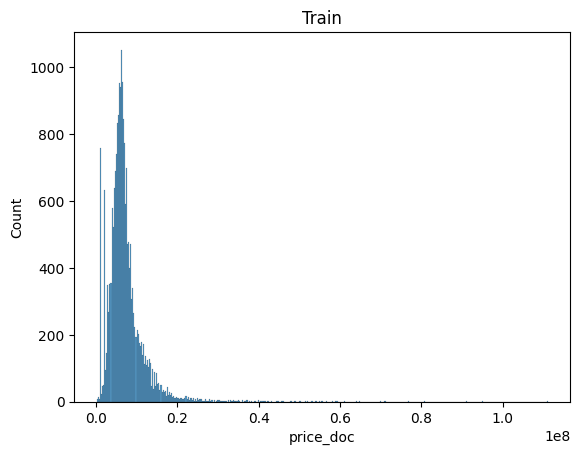

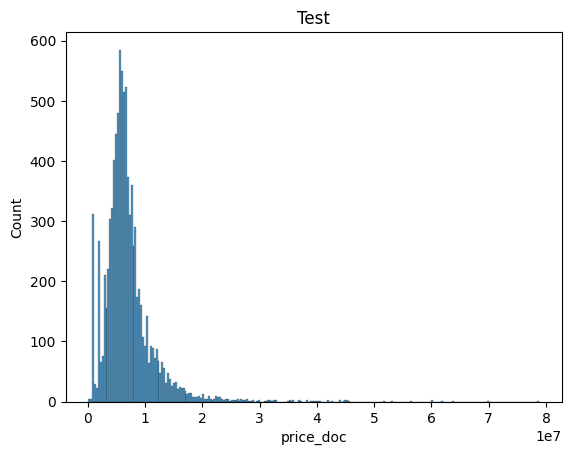

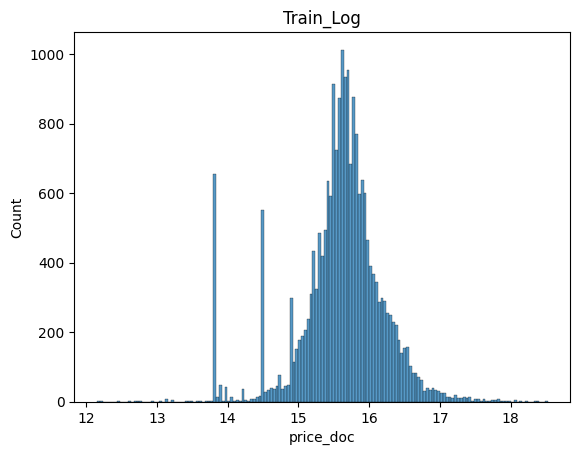

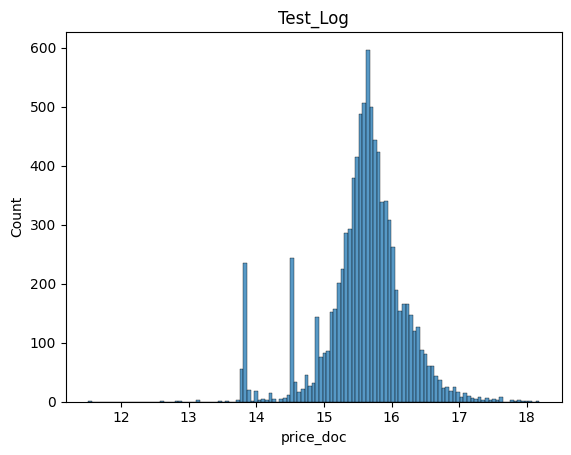

In [419]:
### BEGIN Solution (do not delete this comment)
import seaborn as sns

sns.histplot(y_train).set(title='Train')
plt.show()
sns.histplot(y_test).set(title='Test')
plt.show()

y_train_log = np.log(1 + y_train)
y_test_log = np.log(1 + y_test)
#use log(1 + x) instead of log(x) to use MSE later

sns.histplot(y_train_log).set(title='Train_Log')
plt.show()
sns.histplot(y_test_log).set(title='Test_Log')
plt.show()
### END Solution (do not delete this comment)

**8.1.5) print the number of features in the created ```x_train``` and ```x_test``` datasets. Answer the question: do you think all of these features are relevant for the adequate price prediction?**


In [317]:
### BEGIN Solution (do not delete this comment)
print(f'Train size = {X_train.shape}')
print(f'Test size = {X_test.shape}')
### END Solution (do not delete this comment)

Train size = (21329, 560)
Test size = (9142, 560)


**Your text answer (do not delete this comment)**:

There are too many features in this dataset and not all of them are equally important for our problem.

There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

**8.1.6) use random forest to find the importance of the features. Plot the histogram of the importances.**

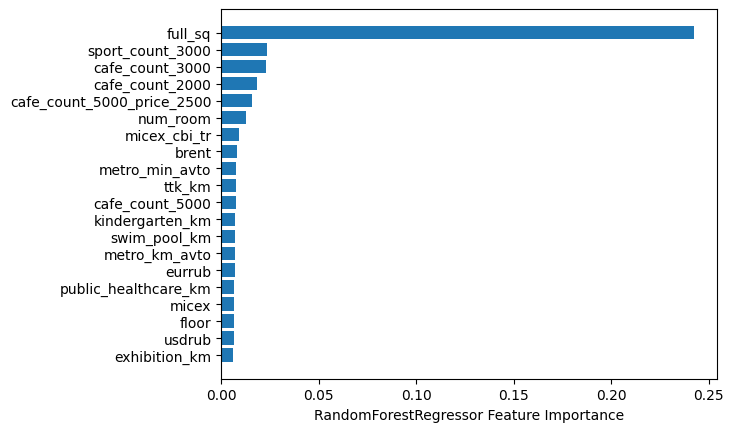

In [335]:
### BEGIN Solution (do not delete this comment)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train_log)
sorted_idx = model.feature_importances_.argsort()[-20:] #leave only 20 most important features
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel(f"{model.__class__.__name__} Feature Importance")
plt.show()
### END Solution (do not delete this comment)

**8.1.7) print the names of the 20 most important features**

In [339]:
### BEGIN Solution (do not delete this comment)
print(X.columns[sorted_idx])
### END Solution (do not delete this comment)

Index(['exhibition_km', 'usdrub', 'floor', 'micex', 'public_healthcare_km',
       'eurrub', 'metro_km_avto', 'swim_pool_km', 'kindergarten_km',
       'cafe_count_5000', 'ttk_km', 'metro_min_avto', 'brent', 'micex_cbi_tr',
       'num_room', 'cafe_count_5000_price_2500', 'cafe_count_2000',
       'cafe_count_3000', 'sport_count_3000', 'full_sq'],
      dtype='object')


<br>

### Subproblem 8.2. Training models on the most important features (1 point)

In this subproblem, you will train several ML models on the found 20 most important features: train **Linear Regression**,  **Ridge regression**, **Random forest**,  **DecisionTree** and evaluate their performance using the Root Mean Squared Logarithmic Error (RMSLE) on both train/test sets. 

You will have to repeat the same actions in the next tasks too, so we recommend to implement
a dedicated function for comparisons, which
1. it takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)` as the input;
2. it trains **all of the listed models** on the `(X_train, y_train)` sample;
3. it computes and returns a table with the RMSLE score of each fitted model on the train and test datasets.

**8.2.1) Implement the function described above**

In [446]:
### BEGIN Solution (do not delete this comment)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor

def comparator(X_train, y_train, X_test, y_test):
    scores = []
    models = [LinearRegression(), Ridge(),
              RandomForestRegressor(n_jobs=-1), DecisionTreeRegressor()]
    models_names = [model.__class__.__name__ for model in models]
    for model in models:
        sc = []
        
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        sc.append(round(mse(y_train, train_pred), 2))
        
        test_pred = model.predict(X_test)
        sc.append(round(mse(y_test, test_pred), 2))
        
        scores.append(sc)
    
    format_row = "{:>21}" * 3
    mode = ['Train', 'Test']
    print(format_row.format("Model", *mode))
    for model, row in zip(models_names, scores):
        print(format_row.format(model, *row))
### END Solution (do not delete this comment)

**8.2.2) Apply the implemented function to our dataset (use only the 20 most important features)**

In [360]:
### BEGIN Solution
train(X_train, y_train_log, X_test, y_test_log)
### END Solution

                Model                Train                 Test
     LinearRegression                 0.49                  0.5
                Ridge                 0.49                  0.5
RandomForestRegressor                 0.18                 0.47
DecisionTreeRegressor                  0.0                 0.66


<br>

### Subproblem 8.3. Forward-backward methods (1 point)
In the subproblems above, we have relied on the feature importances found by the random forest method. The main goal of this subproblem is to find them by appling the forward-backward methods: the main idea is to add or remove features and compute how this removal influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

In subtasks 8.3.1 - 8.3.3, implement the following greedy feature selection algorithm with early stopping using the mean of the RMSLE scores achieved on the 3-fold cross-validation. Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is** and look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html) for more information.

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unused* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

**8.3.1) In the cell below, you have to implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model's "quality".** 

In [457]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
    for i in range(X.shape[1]):
        if i not in used_features:
            scores[i] = cross_val_score(model, X.iloc[:, list(used_features) + [i]], y, cv=cv,
                                        n_jobs=-1, scoring='neg_root_mean_squared_error').mean()
            
    ### END Solution

    return scores

**8.3.2) Implement a forward greedy feature selection function (the one described in the pseudocode in the subtask 1 above) that would**

**- compute the model's "quality" over currently *unused* features**

**- find the feature, which has given the best score and add to the list of the currently *used* features**

**- if the model's quality has increased since the last round, add this feauture to the list of the best features and  print the best score and the current best features list**

**Do not forget to implement the early stopping.**

In [27]:
def forward_steps(X, y, n_rounds, model):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        model: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    quality = -np.inf
    rounds = 0
    while rounds < n_rounds:
        rounds += 1
        scores = selection_step(model, X, y, used_features=feat_best_list)
        new_best_feature = max(scores, key=scores.get)
        feat_best_list += [new_best_feature]
        new_quality = scores[new_best_feature]
        if new_quality > quality:
            print(f'New best score {new_quality}')
            print(feat_best_list)
            quality = new_quality
            rounds = 0
    ### END Solution
    
    return feat_best_list


**8.3.3) Use the function implemented above + DecisionTreeRegressor to get the best features according to this algorithm. (HINT: Use ```n_rounds = 2```)**

In [459]:
### BEGIN Solution
forward_alg_features = forward_steps(X_train, y_train_log, 2, DecisionTreeRegressor())
print(forward_alg_features)
print(X_train.columns[forward_alg_features])
### END Solution

[0, 544, 444, 475, 468, 459, 515, 401, 421, 463, 514, 504, 383, 494, 466, 379, 462, 376, 471, 473, 377, 461, 472, 510, 460]
Index(['full_sq', 'ecology_no data', 'sub_area_Nekrasovka',
       'sub_area_Poselenie Vnukovskoe', 'sub_area_Poselenie Novofedorovskoe',
       'sub_area_Poselenie Filimonkovskoe', 'sub_area_Zapadnoe Degunino',
       'sub_area_Hamovniki', 'sub_area_Krylatskoe',
       'sub_area_Poselenie Krasnopahorskoe', 'sub_area_Zamoskvorech'e',
       'sub_area_Troickij okrug', 'sub_area_Birjulevo Zapadnoe',
       'sub_area_Sokol'niki', 'sub_area_Poselenie Moskovskij',
       'sub_area_Begovoe', 'sub_area_Poselenie Kokoshkino', 'sub_area_Arbat',
       'sub_area_Poselenie Rogovskoe', 'sub_area_Poselenie Shherbinka',
       'sub_area_Babushkinskoe', 'sub_area_Poselenie Klenovskoe',
       'sub_area_Poselenie Shhapovskoe', 'sub_area_Vostochnoe',
       'sub_area_Poselenie Kievskij'],
      dtype='object')


**8.3.4) Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.**

In [460]:
### BEGIN Solution
comparator(X_train[X_train.columns[forward_alg_features]], y_train_log,
           X_test[X_train.columns[forward_alg_features]], y_test_log)

### END Solution

                Model                Train                 Test
     LinearRegression                 0.31                  0.3
                Ridge                 0.31                  0.3
RandomForestRegressor                 0.23                 0.24
DecisionTreeRegressor                 0.23                 0.24


<br>

## Task 9. Multi-Class Classification Strategies (1 point)
In this task, you will deal with the multiclass classification problem for the Glass Classification Data. Let's load the dataset.

In [456]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
102,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.00,0.2,2
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

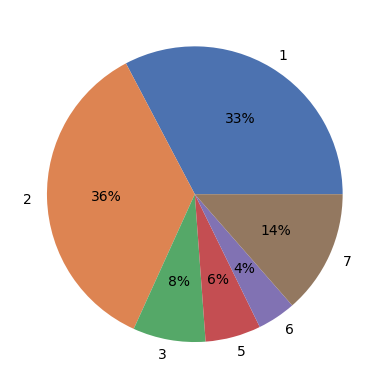

In [482]:
from collections import Counter

s = Counter(y)

data = s.values()
labels = s.keys()

colors = sns.color_palette('deep')[0:6]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [496]:
### BEGIN Solution (do not delete this comment)
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier


def get_score(model):
    return round(cross_val_score(model, X, y,
                           cv=5, scoring='balanced_accuracy', n_jobs=-1).mean(), 2)

models = [
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    LogisticRegression(max_iter=10000)
]

multi, onevsrest, onevsone = [], [], []
multi_t, onevsrest_t, onevsone_t = [], [], []

for model in models:
    t_start = time.perf_counter()
    multi += [get_score(model)]
    multi_t += [round(time.perf_counter() - t_start, 3)]
    
    t_start = time.perf_counter()
    onevsrest += [get_score(OneVsRestClassifier(model, n_jobs=-1))]
    onevsrest_t += [round(time.perf_counter() - t_start, 3)]
    
    t_start = time.perf_counter()
    onevsone += [get_score(OneVsOneClassifier(model, n_jobs=-1))]
    onevsone_t += [round(time.perf_counter() - t_start, 3)]
    
#scores = [[multi[i], onevsrest[i], onevsone[i]] for i in range(len(models))]
#times = [[multi_t[i], onevsrest_t[i], onevsone_t[i]] for i in range(len(models))]
names = ['DecisionTree', 'RandomForest', 'kNN', 'LogisticRegression']
    
format_row = "{:>21}" * 5

print(format_row.format('', *names))
for name, row in zip(['Multiclass', 'OneVsRest', 'OneVsOne'], [multi, onevsrest, onevsone]):
    print(format_row.format(name, *row))
    
print()
    
print(format_row.format('', *names))
for name, row in zip(['Multiclass', 'OneVsRest', 'OneVsOne'], [multi_t, onevsrest_t, onevsone_t]):
    print(format_row.format(name, *row))
    
        
### END Solution (do not delete this comment)

                              DecisionTree         RandomForest                  kNN   LogisticRegression
           Multiclass                 0.53                 0.45                 0.55                 0.49
            OneVsRest                 0.57                 0.55                 0.58                 0.42
             OneVsOne                 0.69                 0.59                 0.55                 0.43

                              DecisionTree         RandomForest                  kNN   LogisticRegression
           Multiclass                0.026                0.129                0.011                0.109
            OneVsRest                0.036                0.633                0.034                0.132
             OneVsOne                0.027                1.701                0.106                0.274


**Which metric did you choose to optimize during cross validation and why? Explain**

**Your text answer (do not delete this comment)**:

From the distribution of class labels we can see that our classes are unbalanced so it seems reasonable to use balanced accuracy.

**For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?**

**Your text answer (do not delete this comment)**:

Decision tree perfomance increased by 30%

# Task 10. Stacking (2 points)

Stacking is an ensembling approach, which combines several algorithms (base models) to get better results. This is achieved by **a)** training the base models (any ML models) on the initial train data (or parts of the train data, see the paragraph below), **b)** training the meta-model (also an ML model) on the predictions of those base models.

One of the main problems of stacking is overfitting. To avoid it, when evaluating the performance of the meta-model on the train set, the training data is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models. The $ n $ -th fold is used for the overall prediction (calculating the meta-factor) in the following manner: the predictions on the $ n $ -th fold are made by the base models (already trained on the rest of the dataset), then these predictions are fed as inputs to the meta-model.

When evaluating the performance of the meta-model on the test set, there can be used various approaches$.^{[1]}$ For example, in order, to obtain meta-factors for the test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers (once again, as it is said in the paragraph above, if we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained).  

You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.S. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer ([source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning)). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  

**Your task will be:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models (base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml, features e.t.c) and train them.
* Report individual accuracy on test set for each of the models.
* Train the metaclassifier on the original datasets features, report score on test.
* Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.
* Does stacking help to gain better score?

For this task we will use the dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype). Split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [6]:
from sklearn import datasets
fc = datasets.fetch_covtype()

Write meta classifier function.

In [5]:
from sklearn.model_selection import cross_val_predict
from tqdm.notebook import tqdm

def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    :param cv: number of cross-validation folds.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    X_n, X_1, y_n, y_1 = train_test_split(X_train, y_train, test_size=1/cv, random_state=42)
    preds, preds_test = [], []
    
    for model in base_clfs:
        model.fit(X_n, y_n)
        preds += [model.predict(X_1)]
    
    preds = np.array(preds)
    
    final_classifier.fit(preds.T, y_1)
    
    for model in base_clfs:
        model.fit(X_train, y_train)
        preds_test += [model.predict(X_test)]
        
    preds_test = np.array(preds_test)
    return final_classifier.predict(preds_test.T), final_classifier
        
    ### END Solution (do not delete this comment)

### Subproblem 10.1 (1 point)

**10.1.1) Chose 6 different base models (base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them.**

In [20]:
np.unique(fc.target)

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [10]:
### BEGIN Solution (do not delete this comment)
X_train, X_test, y_train, y_test = train_test_split(fc.data, fc.target - 1,
                                                  test_size=0.4, random_state=42)

models = [
    LogisticRegression(C=1),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=10),
    XGBClassifier(n_jobs=-1),
    RandomForestClassifier(n_estimators=50, n_jobs=-1),
    KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
]

for model in models:
    model.fit(X_train, y_train)
    print(f'{model.__class__.__name__} train score {accuracy_score(y_train, model.predict(X_train))}')
### END Solution (do not delete this comment)

LogisticRegression train score 0.6193478616321532
DecisionTreeClassifier train score 0.7045899824157289
DecisionTreeClassifier train score 0.7841179322274079
XGBClassifier train score 0.8829656317859366
RandomForestClassifier train score 0.9999713144027516
KNeighborsClassifier train score 0.9792775245476999


**10.1.2) Report individual scores on test set. As a score use accuracy.**

In [26]:
### BEGIN Solution (do not delete this comment)
for model in models:
    print(f'{model.__class__.__name__} test score {accuracy_score(y_test, model.predict(X_test))}')
### END Solution (do not delete this comment)

LogisticRegression test score 0.6195735892084938
DecisionTreeClassifier test score 0.7016845592822873
DecisionTreeClassifier test score 0.7774230330672748
XGBClassifier test score 0.8696671758352875
RandomForestClassifier test score 0.9461156171338827
KNeighborsClassifier test score 0.959454400722876


### Subproblem 10.2 (1 point)

**10.2.1) Train metaclassifier on original datasets features. And report score on test.**

In [11]:
### BEGIN Solution (do not delete this comment)
meta = XGBClassifier(n_jobs=-1)
meta.fit(X_train, y_train)
print(f'Metaclassifier test score {accuracy_score(y_test, meta.predict(X_test))}')
### END Solution (do not delete this comment)

Metaclassifier test score 0.8696671758352875


**10.2.2) Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.**

In [12]:
### BEGIN Solution (do not delete this comment)
meta_preds, meta_trained = meta_classifier(models, meta, X_train, X_test, y_train, 6)
print(f'Metaclassifier with stacking test score {accuracy_score(meta_preds, y_test)}')
### END Solution (do not delete this comment)

Metaclassifier with stacking test score 0.9616402400981046


**10.2.3) Does stacking helped to gain better score?**

**Your text answer (do not delete this comment)**:

Yes, score with stacking is higher than score of any base model alone.